Connected-component labeling (also known as connected-component analysis, blob extraction, or region labeling) is an algorithmic application of graph theory that is used to determine the connectivity of “blob”-like regions in a binary image.

We often use connected-component analysis in the same situations that contours are used; however, connected-component labeling can often give us a more granular filtering of the blobs in a binary image. When using contour analysis, we are often restricted by the hierarchy of the outlines (i.e. one contour contained within another), but with connected-component analysis we can more easily segment and analyze these structures.

Once we have extracted the blob using connected-component labeling, we can still apply contour properties to quantify the region. A great example usage of connected-component analysis is to compute the connected-components of a binary (i.e. thresholded) license plate image and filter the blobs based on their properties, such as width, height, area, solidity, etc.

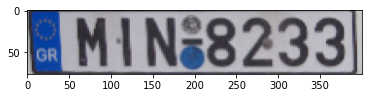

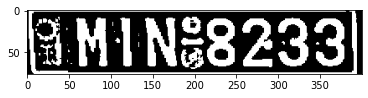

In [1]:
# import the necessary packages
from skimage.filters import threshold_local
from skimage import measure
import numpy as np
import cv2
from matplotlib import pyplot as plt


# load the license plate image from disk
plate = cv2.imread("license_plate.png")

# extract the Value component from the HSV color space and apply adaptive thresholding
# to reveal the characters on the license plate
V = cv2.split(cv2.cvtColor(plate, cv2.COLOR_BGR2HSV))[2]
img_thresh = cv2.adaptiveThreshold(V, 255, cv2.ADAPTIVE_THRESH_MEAN_C,	cv2.THRESH_BINARY_INV, 17, 3)

# show the images
plt.imshow(cv2.cvtColor(plate, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_thresh, cv2.COLOR_BGR2RGB))
plt.show()

In [2]:
# perform connected components analysis on the thresholded images and initialize the
# mask to hold only the "large" components we are interested in
labels = measure.label(img_thresh, background=0)
            
our_mask = np.zeros( img_thresh.shape, dtype="uint8")
print("[INFO] found {} blobs".format(len(np.unique(labels))))

[INFO] found 35 blobs


[INFO] label: 0 (background)
[INFO] label: 1 (foreground)


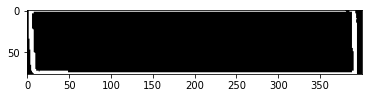

[INFO] label: 2 (foreground)


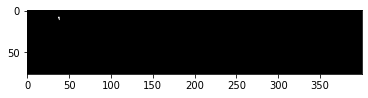

[INFO] label: 3 (foreground)


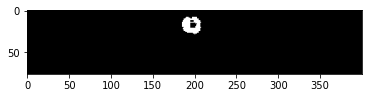

[INFO] label: 4 (foreground)


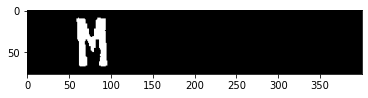

[INFO] label: 5 (foreground)


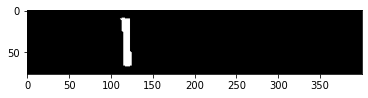

[INFO] label: 6 (foreground)


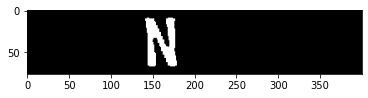

[INFO] label: 7 (foreground)


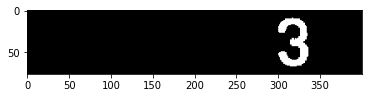

[INFO] label: 8 (foreground)


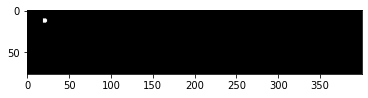

[INFO] label: 9 (foreground)


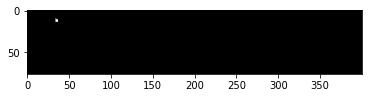

[INFO] label: 10 (foreground)


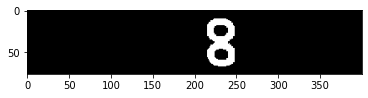

[INFO] label: 11 (foreground)


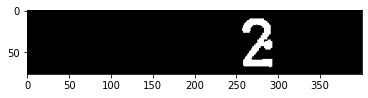

[INFO] label: 12 (foreground)


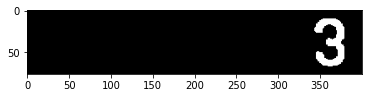

[INFO] label: 13 (foreground)


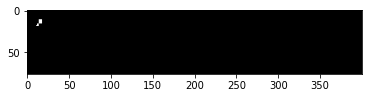

[INFO] label: 14 (foreground)


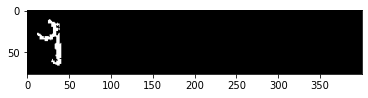

[INFO] label: 15 (foreground)


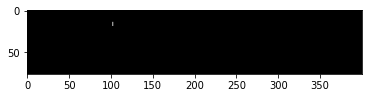

[INFO] label: 16 (foreground)


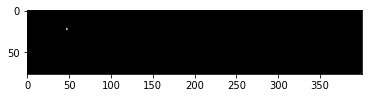

[INFO] label: 17 (foreground)


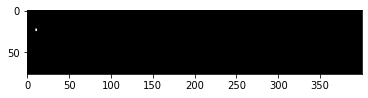

[INFO] label: 18 (foreground)


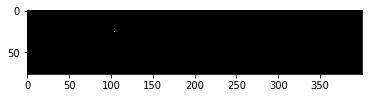

[INFO] label: 19 (foreground)


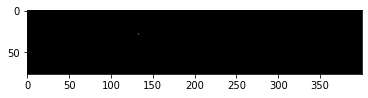

[INFO] label: 20 (foreground)


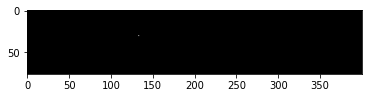

[INFO] label: 21 (foreground)


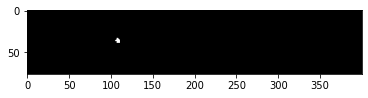

[INFO] label: 22 (foreground)


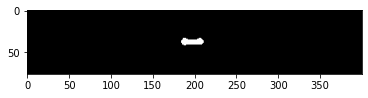

[INFO] label: 23 (foreground)


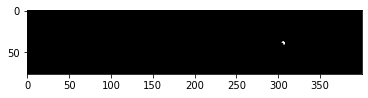

[INFO] label: 24 (foreground)


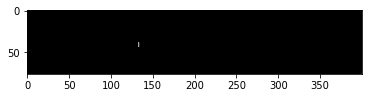

[INFO] label: 25 (foreground)


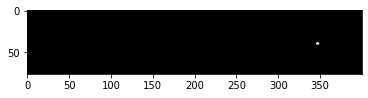

[INFO] label: 26 (foreground)


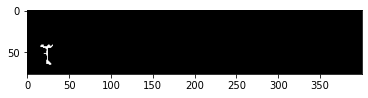

[INFO] label: 27 (foreground)


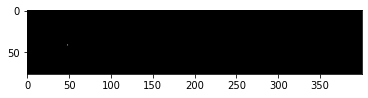

[INFO] label: 28 (foreground)


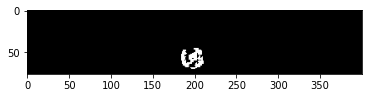

[INFO] label: 29 (foreground)


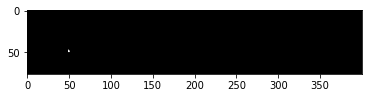

[INFO] label: 30 (foreground)


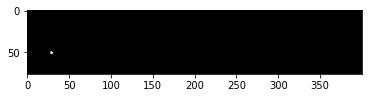

[INFO] label: 31 (foreground)


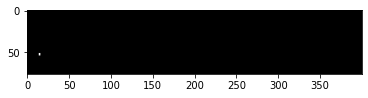

[INFO] label: 32 (foreground)


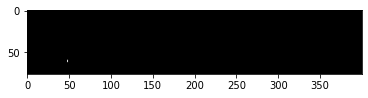

[INFO] label: 33 (foreground)


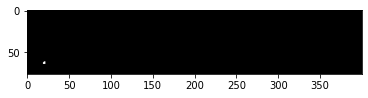

[INFO] label: 34 (foreground)


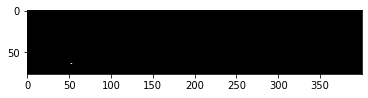

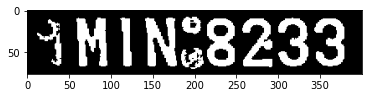

In [3]:
# loop over the unique components
for (i, label) in enumerate(np.unique(labels)):
	
	# if this is the background label, ignore it
	if label == 0:
		print("[INFO] label: 0 (background)")
		continue

	# otherwise, construct label mask to display only connected components for the current label
	print(f"[INFO] label: {i} (foreground)")
	labelMask = np.zeros(img_thresh.shape, dtype="uint8")
	labelMask[labels == label] = 255
	numPixels = cv2.countNonZero(labelMask)
 
	# if the number of pixels in the component is sufficiently large, add it to our
	# mask of "large" blobs
	if numPixels > 300 and numPixels < 1500:
		our_mask = cv2.add(our_mask, labelMask)
  
	# show the label mask
	plt.imshow(cv2.cvtColor(labelMask, cv2.COLOR_BGR2RGB))
	plt.show()

# show the large components in the image
plt.imshow(cv2.cvtColor(our_mask, cv2.COLOR_BGR2RGB))
plt.show()